<a href="https://colab.research.google.com/github/anjalibalu123/clustering-nlp/blob/main/28_10_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/dataset/abcnews-date-text.csv',usecols=["headline_text"],nrows=10000)
df
#usecols= is used to evida publish date venda headline text mathram mathi drop nu pakaram
#nrows=10000 used namda colab athrayum support allathond venamenkill full edukam process cheyan time koodum

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
...,...
9995,us units attack palace as fighting rages in heart
9996,vasco win 10 goal thriller in brazil on edmundos
9997,vic bushfires inquiry begins
9998,vic govt plan aims to reduce water use


In [ ]:
#unsuperviced anu out put illa so namal clustering cheyunnu

In [ ]:
#tweets lott save akiya pola thanna evida txt nu koodukune ullu

In [ ]:
txt=df.headline_text
txt

0       aba decides against community broadcasting lic...
1          act fire witnesses must be aware of defamation
2          a g calls for infrastructure protection summit
3                air nz staff in aust strike for pay rise
4           air nz strike to affect australian travellers
                              ...                        
9995    us units attack palace as fighting rages in heart
9996     vasco win 10 goal thriller in brazil on edmundos
9997                         vic bushfires inquiry begins
9998               vic govt plan aims to reduce water use
9999            vic govt urged to green light marina plan
Name: headline_text, Length: 10000, dtype: object

In [ ]:
#special chara remove
txt=txt.str.replace("[^a-zA-Z0-9]+"," ")  #special character remove akan
txt

<ipython-input-5-084b7b7e273a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  txt=txt.str.replace("[^a-zA-Z0-9]+"," ")  #special character remove akan


0       aba decides against community broadcasting lic...
1          act fire witnesses must be aware of defamation
2          a g calls for infrastructure protection summit
3                air nz staff in aust strike for pay rise
4           air nz strike to affect australian travellers
                              ...                        
9995    us units attack palace as fighting rages in heart
9996     vasco win 10 goal thriller in brazil on edmundos
9997                         vic bushfires inquiry begins
9998               vic govt plan aims to reduce water use
9999            vic govt urged to green light marina plan
Name: headline_text, Length: 10000, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer  #wordtokenizer ayalum mathi
stemmer=SnowballStemmer('english')
tk=TweetTokenizer()

In [ ]:
txt=txt.apply(lambda x:[stemmer.stem(token.lower()) for token in tk.tokenize(x)]).apply(lambda token:" ".join(token))
txt

0          aba decid against communiti broadcast licenc
1                    act fire wit must be awar of defam
2             a g call for infrastructur protect summit
3              air nz staff in aust strike for pay rise
4             air nz strike to affect australian travel
                             ...                       
9995        us unit attack palac as fight rage in heart
9996    vasco win 10 goal thriller in brazil on edmundo
9997                          vic bushfir inquiri begin
9998               vic govt plan aim to reduc water use
9999            vic govt urg to green light marina plan
Name: headline_text, Length: 10000, dtype: object

In [ ]:
from nltk.corpus import stopwords #stem or corpus import akam
import nltk        #copy
nltk.download('stopwords') #copy
sw=stopwords.words("english")
sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
txt=txt.apply(lambda x:[token for token in tk.tokenize(x) if token not in sw]).apply(lambda token:" ".join(token))
txt

0            aba decid communiti broadcast licenc
1                    act fire wit must awar defam
2             g call infrastructur protect summit
3               air nz staff aust strike pay rise
4          air nz strike affect australian travel
                          ...                    
9995        us unit attack palac fight rage heart
9996    vasco win 10 goal thriller brazil edmundo
9997                    vic bushfir inquiri begin
9998            vic govt plan aim reduc water use
9999         vic govt urg green light marina plan
Name: headline_text, Length: 10000, dtype: object

In [ ]:
txt=txt.apply(lambda x:[token for token in tk.tokenize(x) if len(token)>2]).apply(lambda token:" ".join(token))
txt

0         aba decid communiti broadcast licenc
1                 act fire wit must awar defam
2            call infrastructur protect summit
3               air staff aust strike pay rise
4          air strike affect australian travel
                         ...                  
9995        unit attack palac fight rage heart
9996    vasco win goal thriller brazil edmundo
9997                 vic bushfir inquiri begin
9998         vic govt plan aim reduc water use
9999      vic govt urg green light marina plan
Name: headline_text, Length: 10000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(txt)
print(X)

  (0, 3645)	0.47027473375751233
  (0, 943)	0.47799782429829546
  (0, 1444)	0.35278224419585436
  (0, 1769)	0.40673400368770146
  (0, 146)	0.5103644709222088
  (1, 1783)	0.4921756808813915
  (1, 560)	0.4729217098434841
  (1, 4164)	0.38964572098383743
  (1, 6936)	0.4256166321182425
  (1, 2450)	0.2871157610862832
  (1, 198)	0.34452777801914436
  (2, 6083)	0.5074623354708966
  (2, 4892)	0.49596149094917574
  (2, 3212)	0.603843955663636
  (2, 1060)	0.3631482545495525
  (3, 5276)	0.4032865311963851
  (3, 4574)	0.40863442085309437
  (3, 6026)	0.40126174130834125
  (3, 538)	0.3808058275033573
  (3, 5922)	0.4671270723556268
  (3, 269)	0.38229062089434696
  (4, 6444)	0.4946246151090834
  (4, 542)	0.4138785263344187
  (4, 236)	0.49773233288998325
  (4, 6026)	0.41987466825482267
  :	:
  (9995, 6602)	0.38380819329854754
  (9996, 2124)	0.4880040186486571
  (9996, 6680)	0.4880040186486571
  (9996, 903)	0.40059219855433287
  (9996, 6305)	0.39202641592575405
  (9996, 2728)	0.3813796025454478
  (9996, 6

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[9964.253344534669, 9926.900619249951, 9899.633683375416, 9873.389278542068, 9861.492195208935, 9828.373690876266, 9822.31356961669, 9788.133255974253, 9789.09773639568, 9759.445762971134]


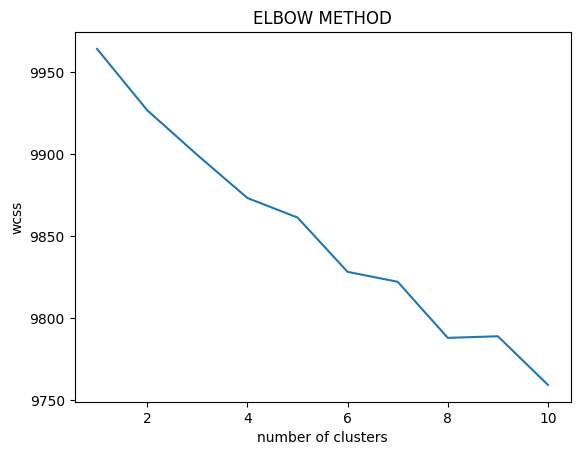

In [ ]:
#clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,random_state=1)
  km.fit(X)
  wcss.append(km.inertia_)
print(wcss)
plt.plot(range(1,11),wcss)
plt.xlabel("number of clusters")
plt.ylabel('wcss')
plt.title('ELBOW METHOD')
plt.show()

In [ ]:
#bending kand pidikan last nu ulla first bend nokanam ans :9

In [ ]:
km=KMeans(n_clusters=9,random_state=1)
y=km.fit_predict(X)
y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 3, 1, ..., 1, 0, 0], dtype=int32)

In [ ]:
df['cluster']=y
df

,headline_text,cluster
0,aba decides against community broadcasting lic...,1
1,act fire witnesses must be aware of defamation,3
2,a g calls for infrastructure protection summit,1
3,air nz staff in aust strike for pay rise,1
4,air nz strike to affect australian travellers,1
...,...,...
9995,us units attack palace as fighting rages in heart,1
9996,vasco win 10 goal thriller in brazil on edmundos,1
9997,vic bushfires inquiry begins,1
9998,vic govt plan aims to reduce water use,0
